# Projeto 2 - Ciência dos Dados
---

### Turma C

### Nomes
Gustavo Eizo Takahashi

João Pedro Lindenberg

Marcos Augusto Rossi Paulino Costa

---

In [134]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re


<h1 style="color:white;">Objetivo do Projeto</h1>

In [135]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\marco\OneDrive\Área de Trabalho\cdados\P2_CEDA2


> O objetivo fundamental do **Projeto 2** consiste em realizar a previsão de uma variável de interesse (denominada como "**Target**") com base em outras variáveis conhecidas como variáveis explicativas ou "**features**", que são variáveis tanto quantitativas quanto qualitativas relacionadas ao target. Tendo em mente que nosso target é qualitativo, estamos planejando desenvolver um **modelo de classificação** destinado a essa variável categórica com base nas "features" selecionadas.


---
<h1 style="color:white;">Introdução do tema e Pergunta Norteadora:</h1>


## Dado o perfil socioeconômico, recursos disponíveis e localização geográfica de uma escola, é provável que ela forneça acesso à Internet para seus alunos?

> O assunto escolhido aborda o acesso à internet nas escolas do estado do Amazonas por meio de uma análise de diversos dados. Tendo isso em mente, o propósito do trabalho se resume à seguinte pergunta: é possível saber se uma determinada escola fornece ou não acesso à internet aos alunos com base em características da escola? Alguns exemplos dessas características são: quantidade de profissionais, tipo de localização (área urbana ou rural), dependência administrativa (pública ou privada), etc.

> A relevância prática desse classificador é significativa, pois ele proporciona uma ferramenta valiosa para a tomada de decisões e o direcionamento de recursos. Ao categorizar as escolas com base em suas características, o classificador pode auxiliar na identificação daquelas que necessitam de investimentos específicos para melhorar ou implementar o acesso à internet. Dessa forma, contribui não apenas para o entendimento da situação atual, mas também para o desenvolvimento de estratégias eficazes visando aprimorar a conectividade nas escolas, promovendo um ambiente educacional mais inclusivo e tecnologicamente avançado.

---
<h1 style="color:white"> Minerando Dados e Características do Dataset:</h1>

Microdados do Censo Escolar da Educação Básica 2022

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar


In [136]:
dados = pd.read_csv("microdados_ed_basica_2022.csv", encoding='cp1252', sep=';')

C:\Users\marco\AppData\Local\Temp\ipykernel_24392\3319943964.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv("microdados_ed_basica_2022.csv", encoding='cp1252', sep=';')


In [137]:
dados.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,0.0,0.0,0.0,0.0,10.0,6.0,4.0,3.0,3.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,2,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0


In [138]:
dados.shape

(224649, 385)

In [139]:
dados.describe()

,NU_ANO_CENSO,CO_REGIAO,CO_UF,CO_MUNICIPIO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_DISTRITO,CO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
count,224649.0,224649.000000,224649.000000,2.246490e+05,224649.000000,224649.000000,2.246490e+05,2.246490e+05,224649.000000,41759.000000,...,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000,178346.000000
mean,2022.0,2.647040,30.259347,3.041188e+06,5.019159,19.830447,3.041188e+08,3.042829e+07,3.101915,1.656769,...,2.822087,1.496383,0.450871,0.423604,0.677520,0.469374,0.208146,4.794747,4.676954,0.117794
std,0.0,1.022897,9.447640,9.484777e+05,3.872808,17.119943,9.484777e+07,9.449441e+06,0.639568,1.194840,...,4.828169,4.721087,3.658270,3.521317,3.031475,1.987312,1.710352,6.146976,6.064907,1.338076
min,2022.0,1.000000,11.000000,1.100015e+06,1.000000,1.000000,1.100015e+08,1.100002e+07,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,2.000000,23.000000,2.313005e+06,2.000000,7.000000,2.313005e+08,2.327619e+07,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.0,3.000000,31.000000,3.112604e+06,4.000000,15.000000,3.112604e+08,3.108828e+07,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
75%,2022.0,3.000000,35.000000,3.547304e+06,6.000000,27.000000,3.547304e+08,3.523732e+07,4.000000,2.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,0.000000
max,2022.0,5.000000,53.000000,5.300108e+06,15.000000,66.000000,5.300108e+08,5.308803e+07,4.000000,4.000000,...,94.000000,167.000000,424.000000,424.000000,365.000000,151.000000,268.000000,146.000000,146.000000,65.000000


In [140]:
# USANDO SOMENTE O AMAZONAS
dados_filtrados = dados[dados['NO_UF'] == 'Amazonas']

# FILTRANDO SOMENTE AS ESCOLAS QUE ESTÃO EM FUNCIONAMENTO
dados_filtrados = dados_filtrados[dados_filtrados['TP_SITUACAO_FUNCIONAMENTO'] == 1]

---
<h2 style="color:white;">Categoria Target definida:</h2>

## 
Variável: IN_INTERNET_ALUNOS

Acesso à Internet - Para uso dos alunos 
- 0: Não 
- 1: Sim






---
<h2 style="color:white;">Pesquisa sobre fatores relacionados ao acesso à internet nas escolas</h2>








- **Taxa de Uso Geral (2013):**
  - 58% dos brasileiros usam a internet.

- **Acesso Residencial:**
  - Entre 48% e 49% das residências brasileiras têm o serviço.
    - 15% em áreas rurais.
    - 85% em áreas urbanas.

- **Acesso por Região:**
  - Sudeste/Sul: 51% dos domicílios têm acesso.
  - Centro-Oeste: 44%.
  - Nordeste: 30%.
  - Norte: 26%.

- **Acesso por Classe Social:**
  - Classe A: 98%.
  - Classe B: 80%.
  - Classe C: 39%.
  - Classes D e E: 8%.

- **Não Usuários Mais Frequentes:**
  - Classes baixas (C, D e E).
  - Pessoas idosas (>60 anos).
  - Pessoas com menor escolaridade (analfabetos/só ensino fundamental).
  - Moradores de áreas rurais (70% nunca usaram a internet).

- **Motivos para Não Uso:**
  1. Não tem computador (63%).
  2. Falta de necessidade/interesse (50%).
  3. Custo elevado (38%).
  4. Falta de habilidade (28%).
  5. Acesso por outro local (12%).
  6. Falta de disponibilidade do serviço na área (12%).

---
<h1 style="color:white;">Análise Exploratória dos Dados</h1>


<h3 style="color:lightgreen;">Escolha à priori de possíveis features
</h3>





**Dependência Administrativa (pública, privada, etc.):**

Escolas públicas podem enfrentar restrições orçamentárias, afetando a disponibilidade de recursos para infraestrutura tecnológica, incluindo acesso à internet. Escolas privadas, por outro lado, podem ter mais flexibilidade financeira para investir em tecnologia.

**Localização (urbana, rural):**

Áreas rurais, onde até 70% dos residentes podem nunca ter usado a internet, podem ter infraestrutura de telecomunicações menos desenvolvida, afetando diretamente a disponibilidade e qualidade do acesso à internet nas escolas situadas nessas regiões.

**Existência de biblioteca na escola:**

Escolas com bibliotecas podem indicar um ambiente educacional mais estruturado e voltado para o acesso à informação. A presença de uma biblioteca sugere um comprometimento com recursos educacionais, o que pode se estender à tecnologia, incluindo o acesso à internet.

**Existência de área verde na escola:**

A presença de área verde pode ser indicativa do ambiente físico da escola e, por extensão, de seu local (urbano ou rural). Escolas em áreas mais desenvolvidas podem ter mais recursos para investir em infraestrutura, incluindo conectividade à internet.

**Total de profissionais gerais da escola (inclusive zeladores, porteiros, técnicos, etc):**

O número total de profissionais na escola pode ser um indicador de sua capacidade administrativa e de recursos humanos. Escolas com uma equipe mais ampla podem ter mais recursos disponíveis para investir em tecnologia, como acesso à internet.

Legenda:
-    <span style="color: cyan">**Variável Qualitativa**</span>
-    <span style="color: orange">**Variável Quantitativa**</span>
---

-   <span style="color: cyan">**TP_DEPENDENCIA**</span> - Dependência Administrativa (pública, privada, etc.)

-   <span style="color: cyan">**TP_LOCALIZACAO**</span> - Localização (urbana, rural)

-   <span style="color: cyan">**IN_BIBLIOTECA**</span> - Indica a existência de biblioteca na escola.

-   <span style="color: cyan">**IN_AREA_VERDE**</span> - Indica a existência de área verde na escola.

-   <span style="color: orange">**'QT_PROF_SERVICOS_GERAIS'**</span> - Total de profissionais gerais da escola (inclusive zeladores, porteiros, técnicos, etc)



<h3 style="color:white;">Filtrando DataFrame
</h3>

In [141]:
# SELECIONANDO SOMENTE AS COLUNAS QUE QUEREMOS
colunas_selecionadas = ['IN_INTERNET_ALUNOS','NO_UF', 'IN_ESGOTO_REDE_PUBLICA', 'IN_BIBLIOTECA', 'TP_LOCALIZACAO','TP_DEPENDENCIA','QT_PROF_SERVICOS_GERAIS']
df_projeto = dados_filtrados[colunas_selecionadas]

# RENOMEANDO AS COLUNAS
df_projeto = df_projeto.rename(columns={
    'IN_INTERNET_ALUNOS':'Alunos Internet',
    'NO_UF':'Estado',
    'IN_ESGOTO_REDE_PUBLICA':'Esgoto',
    'IN_BIBLIOTECA':'Biblioteca',
    'TP_LOCALIZACAO':'Urbano ou Rural',
    'TP_DEPENDENCIA':'Dependencia',
    'QT_PROF_SERVICOS_GERAIS': 'Profissionais Gerais'

})

df_projeto

,Alunos Internet,Estado,Esgoto,Biblioteca,Urbano ou Rural,Dependencia,Profissionais Gerais
3077,0.0,Amazonas,0.0,0.0,1,2,4.0
3078,0.0,Amazonas,0.0,0.0,1,2,0.0
3079,0.0,Amazonas,0.0,0.0,2,3,0.0
3080,0.0,Amazonas,0.0,0.0,2,3,0.0
3081,0.0,Amazonas,0.0,0.0,2,3,1.0
...,...,...,...,...,...,...,...
9398,0.0,Amazonas,0.0,0.0,2,3,0.0
9400,0.0,Amazonas,0.0,1.0,2,3,7.0
9401,0.0,Amazonas,0.0,0.0,2,3,1.0
9402,0.0,Amazonas,0.0,0.0,1,3,2.0


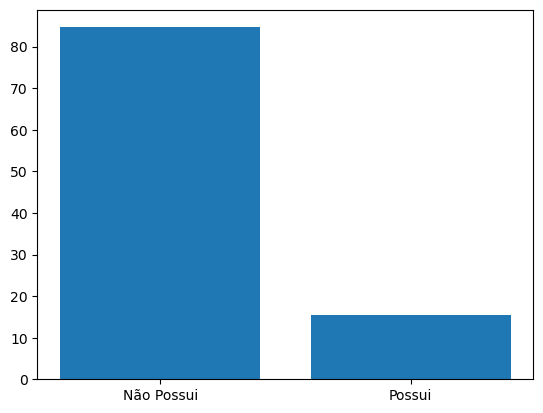

In [142]:
df_internet = pd.DataFrame()

df_internet['Numero de acessos'] = df_projeto['Alunos Internet'].value_counts(normalize=True)*100

df_internet = df_internet.reset_index()

df_internet['Acesso Internet'] = df_internet['index'].map({0:'Não Possui',1:'Possui'})


plt.bar(df_internet['Acesso Internet'], df_internet['Numero de acessos'])
plt.show()



## Verificando a correlação entre as features e o target

### Feature: Localização da escola: Urbana ou Rural

In [143]:
print("Resumo Feature Urbana ou Rural" + "\n-------------------------------")
print(df_projeto["Urbano ou Rural"].describe())

Resumo Feature Urbana ou Rural
-------------------------------
count    5463.000000
mean        1.663555
std         0.472536
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Urbano ou Rural, dtype: float64


In [144]:
cross_table_Urbana_Rural = (pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Urbano ou Rural'])/len(df_projeto))*100

# 54% das localizações urbanas não possuem acesso a internet
# Somente 3.33% na area rural possuem acesso a internet
cross_table_Urbana_Rural

Urbano ou Rural,1,2
Alunos Internet,,
0.0,21.618159,62.493136
1.0,11.403990,3.862347


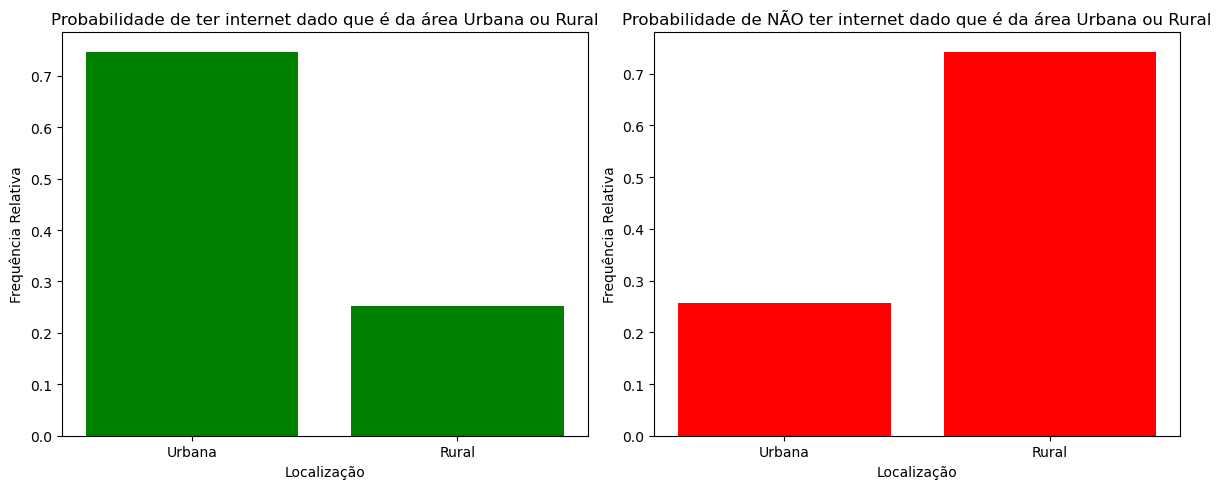

In [145]:
cross_table_Urbana_Rural = pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Urbano ou Rural'], normalize=True)

lista_r = cross_table_Urbana_Rural.stack().reset_index()

lista_r.columns = ['possui_internet', 'urbana_rural', 'p']

rotulos = {1: 'Urbana', 2: 'Rural'}

# DF Filtrada de quem possui internet
df_possui_internet = lista_r[lista_r['possui_internet'] == 1].copy()

df_possui_internet['rotulos'] = df_possui_internet['urbana_rural'].map(rotulos)

# DF Filtrada de quem NÃO possui internet
df_nao_possui_internet = lista_r[lista_r['possui_internet'] == 0].copy()

df_nao_possui_internet['rotulos'] = df_nao_possui_internet['urbana_rural'].map(rotulos)

# Cria subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico
axs[0].bar(df_possui_internet['rotulos'], df_possui_internet['p'] / sum(df_possui_internet['p']), color='green')
axs[0].set_title('Probabilidade de ter internet dado que é da área Urbana ou Rural')
axs[0].set_xlabel('Localização')
axs[0].set_ylabel('Frequência Relativa')

# Segundo gráfico
axs[1].bar(df_nao_possui_internet['rotulos'], df_nao_possui_internet['p'] / sum(df_nao_possui_internet['p']), color='r')
axs[1].set_title('Probabilidade de NÃO ter internet dado que é da área Urbana ou Rural')
axs[1].set_xlabel('Localização')
axs[1].set_ylabel('Frequência Relativa')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe os gráficos
plt.show()


### Feature: Escola possui Biblioteca

In [146]:
cross_table_biblioteca = pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Biblioteca'],normalize=True)
cross_table_biblioteca

Biblioteca,0.0,1.0
Alunos Internet,,
0.0,0.706207,0.140173
1.0,0.047707,0.105913


In [147]:
df_projeto['Biblioteca'].value_counts(normalize=True)

0.0    0.753914
1.0    0.246086
Name: Biblioteca, dtype: float64

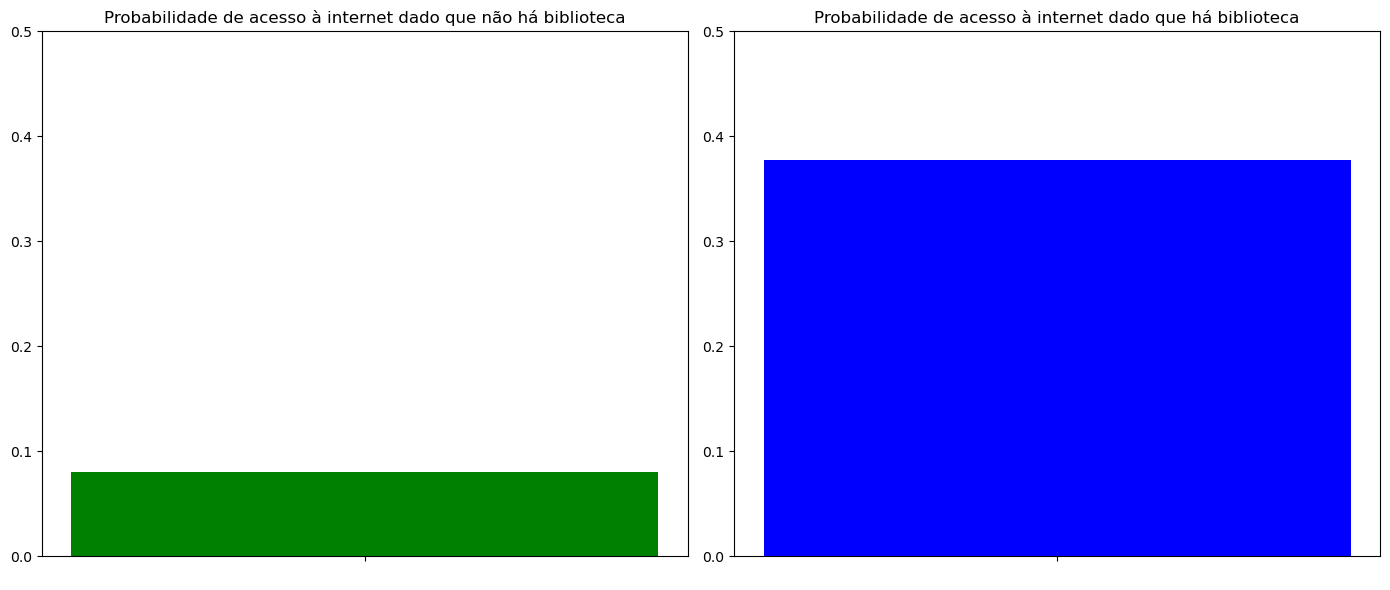

0.37720706260032105
0.08073241781106949


In [177]:
p_biblioteca = cross_table_biblioteca[1].sum()
p_sem_biblioteca = 1-p_biblioteca

# Plote histogramas separados para cada condição de "Biblioteca"
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histograma para Biblioteca = não
p_internet_dado_sem_biblioteca = cross_table_biblioteca.loc[0, 1] / p_sem_biblioteca  # Dividindo pela probabilidade marginal
axes[0].bar(' ', p_internet_dado_sem_biblioteca, color='green')
axes[0].set_title('Probabilidade de acesso à internet dado que não há biblioteca')

# Histograma para Biblioteca = sim
p_internet_dado_com_biblioteca = cross_table_biblioteca.loc[1, 1] / p_biblioteca  # Dividindo pela probabilidade marginal
axes[1].bar(' ', p_internet_dado_com_biblioteca, color='blue')
axes[1].set_title('Probabilidade de acesso à internet dado que há biblioteca')

# Configure a escala para ambos os gráficos usando o máximo das probabilidades
axes[0].set_ylim(0, 0.5)
axes[1].set_ylim(0, 0.5)

plt.tight_layout()
plt.show()

### Feature: escola possui áreas verdes

In [153]:
cross_table_esgoto = pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Esgoto'],normalize=True)
cross_table_esgoto

Esgoto,0.0,1.0
Alunos Internet,,
0.0,0.774913,0.071468
1.0,0.110333,0.043286


In [154]:
df_projeto['Esgoto'].value_counts(normalize=True)

0.0    0.885246
1.0    0.114754
Name: Esgoto, dtype: float64

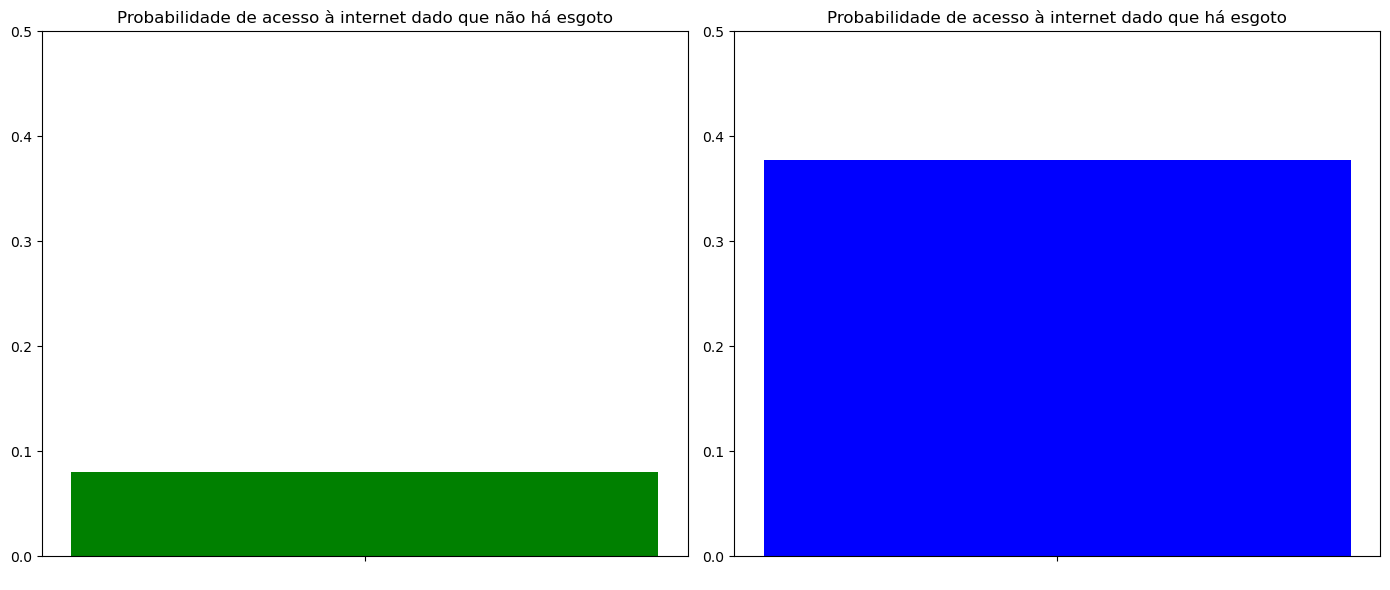

0.37720706260032105
0.08073241781106949


In [176]:
p_esgoto = cross_table_esgoto[1].sum()
p_sem_esgoto = 1-p_esgoto

# Plote histogramas separados para cada condição de "Esgoto"
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histograma para esgoto = não
p_internet_dado_sem_esgoto = cross_table_esgoto.loc[0, 1] / p_sem_esgoto  # Dividindo pela probabilidade marginal
axes[0].bar(' ', p_internet_dado_sem_esgoto, color='green')
axes[0].set_title('Probabilidade de acesso à internet dado que não há esgoto')

# Histograma para esgoto = sim
p_internet_dado_com_esgoto = cross_table_esgoto.loc[1, 1] / p_esgoto  # Dividindo pela probabilidade marginal
axes[1].bar(' ', p_internet_dado_com_esgoto, color='blue')
axes[1].set_title('Probabilidade de acesso à internet dado que há esgoto')

# Configure a escala para ambos os gráficos usando o máximo das probabilidades
axes[0].set_ylim(0, 0.5)
axes[1].set_ylim(0, 0.5)

plt.tight_layout()
plt.show()

In [179]:
df_projeto['Biblioteca'].describe()

count    5429.000000
mean        0.246086
std         0.430769
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Biblioteca, dtype: float64

In [178]:
df_projeto['Esgoto'].describe()

count    5429.000000
mean        0.114754
std         0.318754
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Esgoto, dtype: float64

In [180]:
pd.crosstab(df_projeto['Biblioteca'], df_projeto['Esgoto'],normalize=True)

Esgoto,0.0,1.0
Biblioteca,,
0.0,0.706576,0.047338
1.0,0.178670,0.067416


### Feature: Tipo de Dependência

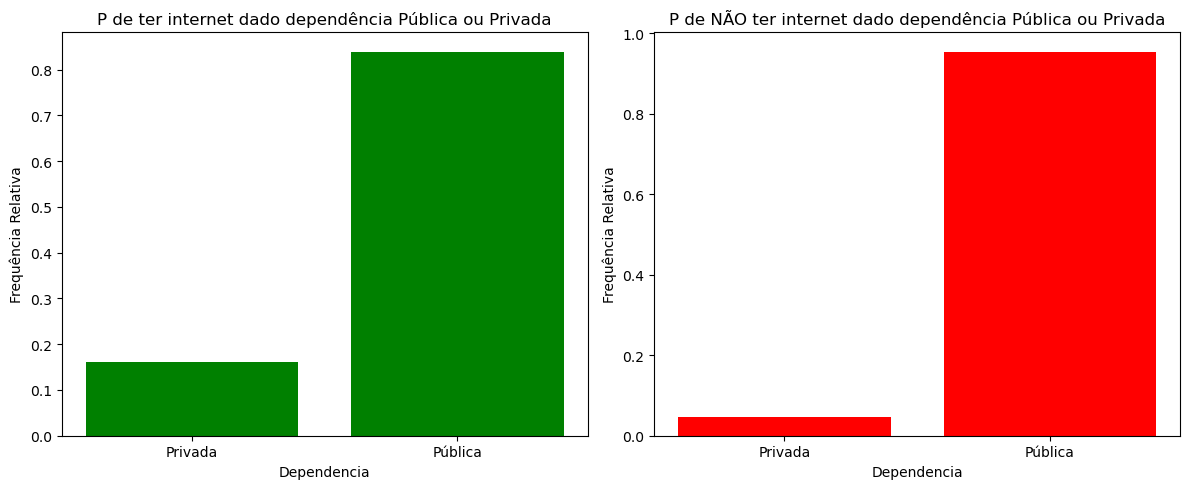

,acesso_internet,tipo_dependencia,intersec
0,0.0,Privada,0.038865
1,0.0,Pública,0.807515
2,1.0,Privada,0.024682
3,1.0,Pública,0.128937


In [ ]:
cross_table_dependencia= pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Dependencia'], normalize=True)

df_dependencia = cross_table_dependencia.stack().reset_index()

df_dependencia.columns = ['acesso_internet', 'dependencia', 'intersec']

df_dependencia['tipo_dependencia'] = df_dependencia['dependencia'].map({1: 'Pública', 2: 'Pública', 3: 'Pública', 4: 'Privada'})

# Agrupa pelos valores de 'acesso_internet' e 'tipo_dependencia' e calcula a soma de 'intersec'
df_dependencia = df_dependencia.groupby(['acesso_internet', 'tipo_dependencia'])['intersec'].sum().reset_index()

# Filtro Possui Internet

df_dependencia_possui_internet = df_dependencia[df_dependencia['acesso_internet'] == 1].copy()

# Filtro NÃO Possui Internet

df_dependencia_nao_possui_internet = df_dependencia[df_dependencia['acesso_internet'] == 0].copy()


# Cria subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico
axs[0].bar(df_dependencia_possui_internet['tipo_dependencia'], df_dependencia_possui_internet['intersec'] / sum(df_dependencia_possui_internet['intersec']), color='green')
axs[0].set_title('P de ter internet dado dependência Pública ou Privada')
axs[0].set_xlabel('Dependencia')
axs[0].set_ylabel('Frequência Relativa')

# Segunfo gráfico
axs[1].bar(df_dependencia_nao_possui_internet['tipo_dependencia'], df_dependencia_nao_possui_internet['intersec'] / sum(df_dependencia_nao_possui_internet['intersec']), color='red')
axs[1].set_title('P de NÃO ter internet dado dependência Pública ou Privada')
axs[1].set_xlabel('Dependencia')
axs[1].set_ylabel('Frequência Relativa')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe os gráficos
plt.show()

df_dependencia


In [ ]:
cross_table_dependencia = (pd.crosstab(df_projeto['Alunos Internet'], df_projeto['Dependencia'])/len(df_projeto))*100
cross_table_dependencia

Dependencia,1,2,3,4
Alunos Internet,,,,
0.0,0.000000,9.445360,70.803588,3.862347
1.0,0.329489,4.393191,8.090793,2.452865


### Feature: Profissionais Gerais

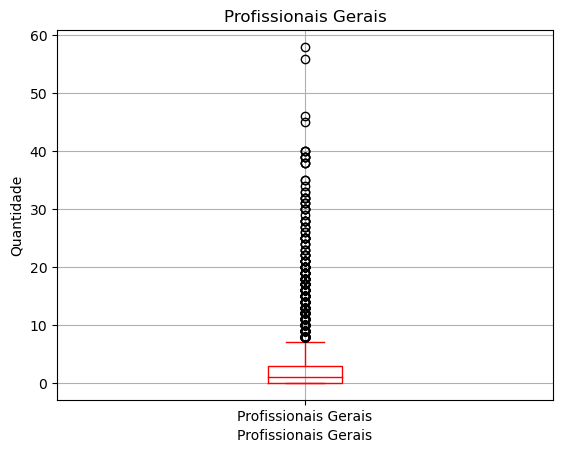

In [ ]:
max_value = df_projeto["Profissionais Gerais"].max()

df_corrected = df_projeto[df_projeto["Profissionais Gerais"] != max_value]
df_corrected["Profissionais Gerais"].describe()

df_corrected["Profissionais Gerais"].plot(kind='box', color='red', grid=True)
plt.title("Profissionais Gerais")
plt.ylabel("Quantidade")
plt.xlabel("Profissionais Gerais")
plt.show()


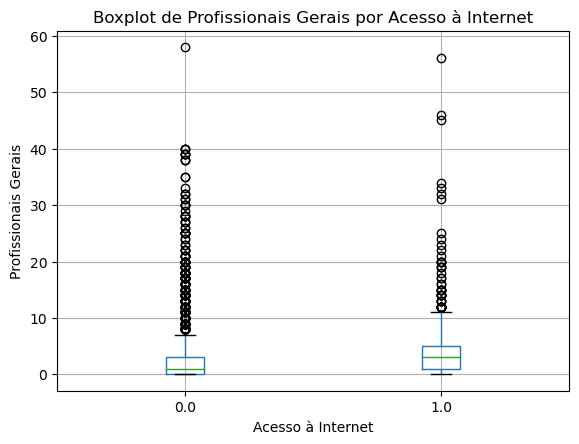

In [ ]:
import matplotlib.pyplot as plt

df_corrected.boxplot(column="Profissionais Gerais", by="Alunos Internet")
plt.title('Boxplot de Profissionais Gerais por Acesso à Internet')
plt.suptitle('') # remover o título extra
plt.xlabel('Acesso à Internet')
plt.ylabel('Profissionais Gerais')
plt.show()


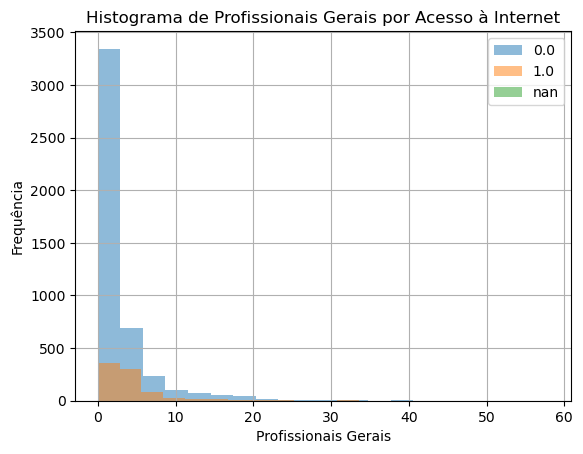

In [ ]:
for category in df_corrected["Alunos Internet"].unique():
    df_corrected[df_corrected["Alunos Internet"]==category]["Profissionais Gerais"].hist(alpha=0.5, bins=20)
  
plt.title('Histograma de Profissionais Gerais por Acesso à Internet')
plt.xlabel('Profissionais Gerais')
plt.ylabel('Frequência')
plt.legend(df_corrected["Alunos Internet"].unique())
plt.show()

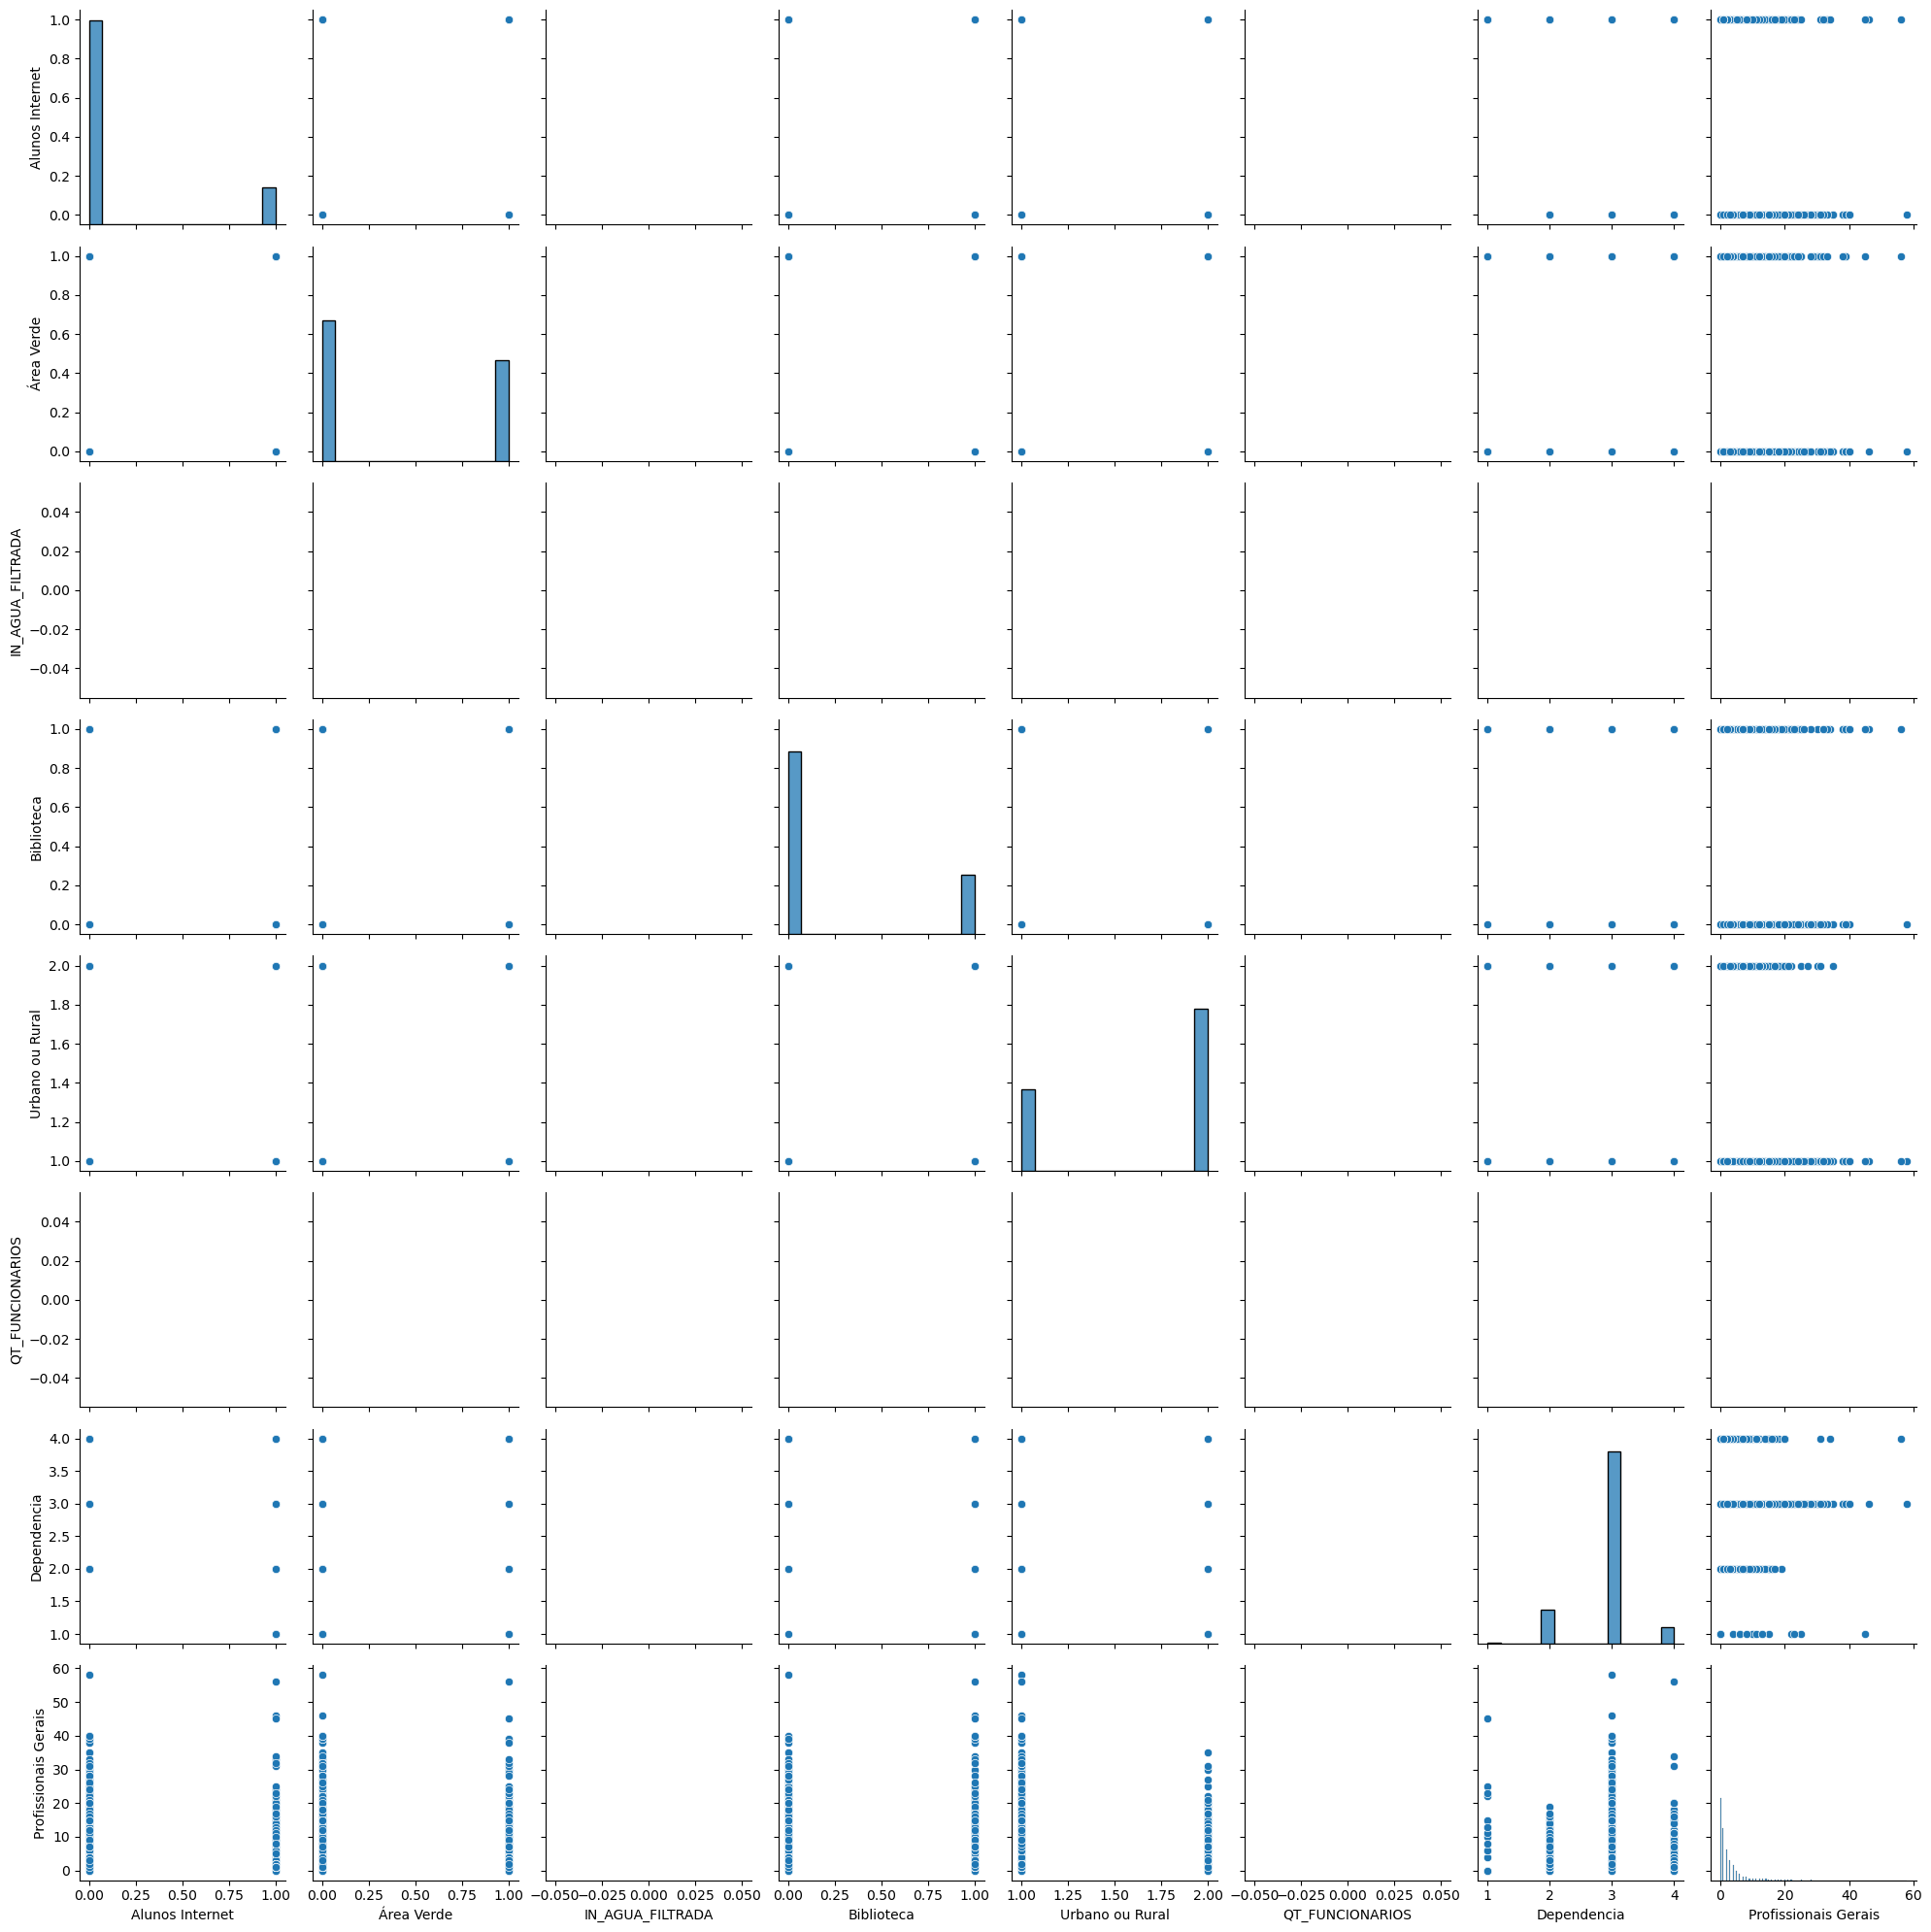

In [ ]:
import seaborn as sns
sns.pairplot(df_corrected)
plt.tight_layout()
plt.show()


# Descrição da Análise Exploratória

A base de dados analisada revela a existência de alguns outliers, ou seja, valores discrepantes, mas não tantos a ponto de comprometerem a análise nas etapas subsequentes do projeto.

Em relação à interdependência entre as variáveis, destaca-se que elementos como dependência, tipo de localização, existência de biblioteca, existência de área verde e quantidade de profissionais gerais possuem correlação forte com a nossa variável target ('Alunos Internet').

---
# Modelos de Predição